# Assignment 6 - Reproducibility and Hyperparameter Search in ML

Team 25, Members:     



| Name | Roll Number |  
| ------ | ------ |  
| Romit Mohane | 23110279 |  
| Rudra Pratap Singh | 23110281 |  

## Introduction
The goal of this assignment is to learn about experiment tracking, version control, and reproducibility in machine learning workflows. You will set up experiment tracking using Weights and Biases.

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install autogluon

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.1 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.5 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.1.0
    Uninstalling setuptools-75.1.0:
      Successfully uninstalled setuptools-75.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-gbq 0.25.0 requires google-api-core<3.0.0dev,>=2.10.2, but you have google-api-core 1.34.1 which is incompatible.
tensorflow-decision-forests 1.10.0 requires tensorflow==2.17.0, but you have tensorflow 2.17.1 which is incompatible.
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup

In [3]:
!pip show autogluon

Name: autogluon
Version: 1.2
Summary: Fast and Accurate ML in 3 Lines of Code
Home-page: https://github.com/autogluon/autogluon
Author: AutoGluon Community
Author-email: 
License: Apache-2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: autogluon.core, autogluon.features, autogluon.multimodal, autogluon.tabular, autogluon.timeseries
Required-by: 


In [4]:
import numpy as np
import pandas as pd
from autogluon.tabular import TabularDataset, TabularPredictor
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = load_iris()

In [6]:
X = data.data
y = data.target.reshape(-1, 1)

In [7]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

## Section 2: Hyperparameters
This section aims to perform a hyperparameter search to improve the performance of a custom model that distinguishes between any three classes.
### Task 1: Hyperparameter Optimization (20%)
  - Use the model trained in the previous section.


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
print("Size of training set:", len(X_train))
print("Size of testing set:", len(X_test))

Size of training set: 120
Size of testing set: 30


In [9]:
# converting the above arrays to TabularDatasets
train_df = pd.DataFrame(np.hstack((X_train, y_train)), columns=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])
test_df = pd.DataFrame(X_test, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
y_test_df = pd.DataFrame(y_test, columns=['target'])
train_data = TabularDataset(train_df)
test_data = TabularDataset(test_df)

print("\nData Split Information:")
print(f"Training samples: {len(train_data)}")
print(f"Testing samples: {len(test_data)}")
print("\nClass distribution in training:")
print(train_df['target'].value_counts(normalize=True))


Data Split Information:
Training samples: 120
Testing samples: 30

Class distribution in training:
target
0.0    0.333333
2.0    0.333333
1.0    0.333333
Name: proportion, dtype: float64


In [ ]:
def train_manual_model(train_data, batch_size, lr, epochs):
    """Train model with manual hyperparameters."""
    search_space = {
        'NN_TORCH': {
            'num_epochs': epochs,  # Different epoch values
            'learning_rate': lr,  # Various learning rates
            'batch_size': batch_size,  # Different batch sizes
            'hidden_size': 16,  # Number of neurons in hidden layers
        }
    }

    print("\nManual Hyperparameters:")
    for param, value in search_space['NN_TORCH'].items():
        print(f"{param}: {value}")

    predictor = TabularPredictor(
        verbosity=1,
        label='target',           # Column name of our target variable
        problem_type='multiclass',  # Multiclass classification
        eval_metric='accuracy',   # Metric to optimize
        path='models/manual_mlp'  # Where to save the model
    )

    print("\nStarting manual training...")
    predictor.fit(
        train_data,
        hyperparameters=search_space,
        time_limit=600,                 # Maximum training time (10 minutes)
        presets='best_quality',
        ag_args_fit={'num_gpus': 1}
    )

    return predictor

- Train the model on the batch size of [2 & 4], learning rate [1e-3 and 1e-5], and epochs [1, 3, and 5].
- Train the model and measure the accuracy and F1 over the test set. Plot the confusion matrix over the test-set predictions.
  - Plot using the truth labels and predicted labels in matplotlib.
- Show the inputs, prediction, and truth values for five samples from the test set.

In [12]:
batch_sizes = [2, 4]
learning_rates = [1e-3, 1e-5]
epochs = [1, 3, 5]


Training with batch_size=2, lr=0.001, epochs=1

Manual Hyperparameters:
num_epochs: 1
learning_rate: 0.001
batch_size: 2
hidden_size: 16

Starting manual training...

Training complete.

Testing the trained model...
Accuracy: 0.3333333333333333
F1 Score: 0.18518518518518517


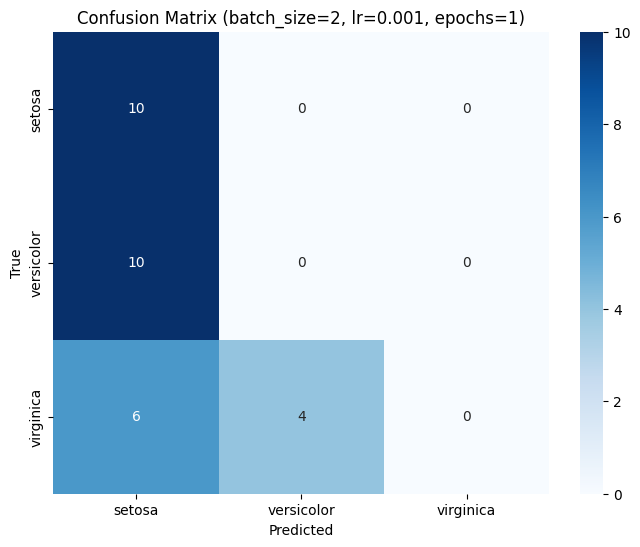

Testing complete.

Training with batch_size=2, lr=0.001, epochs=3

Manual Hyperparameters:
num_epochs: 3
learning_rate: 0.001
batch_size: 2
hidden_size: 16

Starting manual training...

Training complete.

Testing the trained model...
Accuracy: 0.8333333333333334
F1 Score: 0.8222222222222222


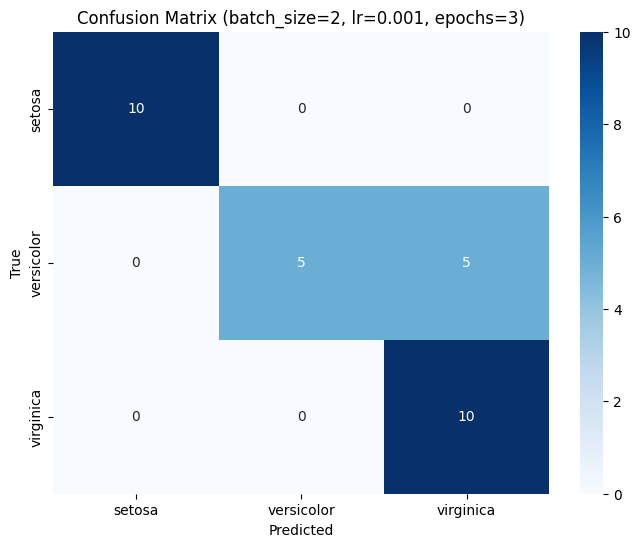

Testing complete.

Training with batch_size=2, lr=0.001, epochs=5

Manual Hyperparameters:
num_epochs: 5
learning_rate: 0.001
batch_size: 2
hidden_size: 16

Starting manual training...

Training complete.

Testing the trained model...
Accuracy: 0.8
F1 Score: 0.7802197802197802


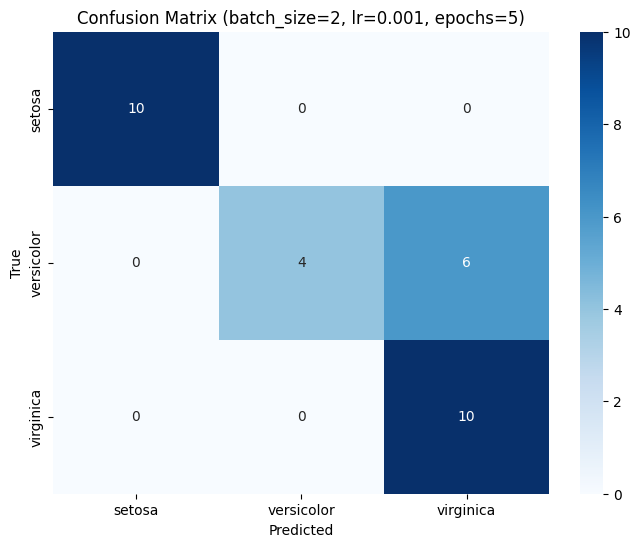

Testing complete.

Training with batch_size=2, lr=1e-05, epochs=1

Manual Hyperparameters:
num_epochs: 1
learning_rate: 1e-05
batch_size: 2
hidden_size: 16

Starting manual training...

Training complete.

Testing the trained model...
Accuracy: 0.3333333333333333
F1 Score: 0.16666666666666666


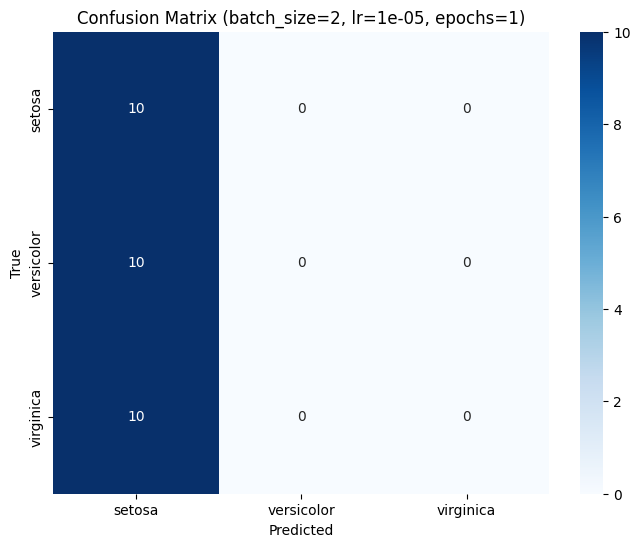

Testing complete.

Training with batch_size=2, lr=1e-05, epochs=3

Manual Hyperparameters:
num_epochs: 3
learning_rate: 1e-05
batch_size: 2
hidden_size: 16

Starting manual training...

Training complete.

Testing the trained model...
Accuracy: 0.3333333333333333
F1 Score: 0.16666666666666666


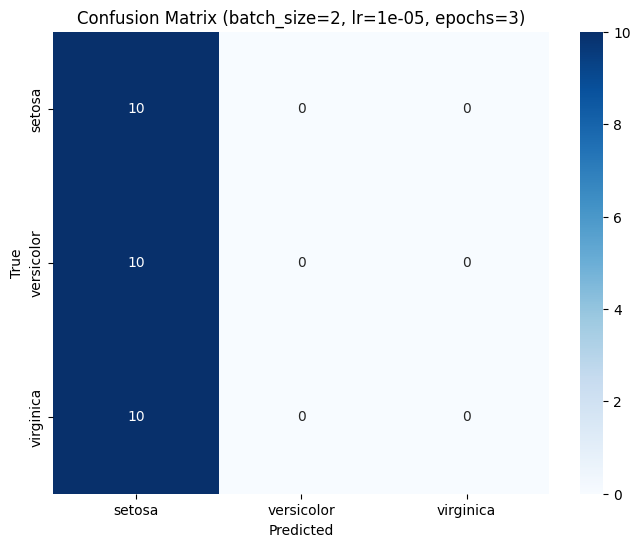

Testing complete.

Training with batch_size=2, lr=1e-05, epochs=5

Manual Hyperparameters:
num_epochs: 5
learning_rate: 1e-05
batch_size: 2
hidden_size: 16

Starting manual training...

Training complete.

Testing the trained model...
Accuracy: 0.3333333333333333
F1 Score: 0.16666666666666666


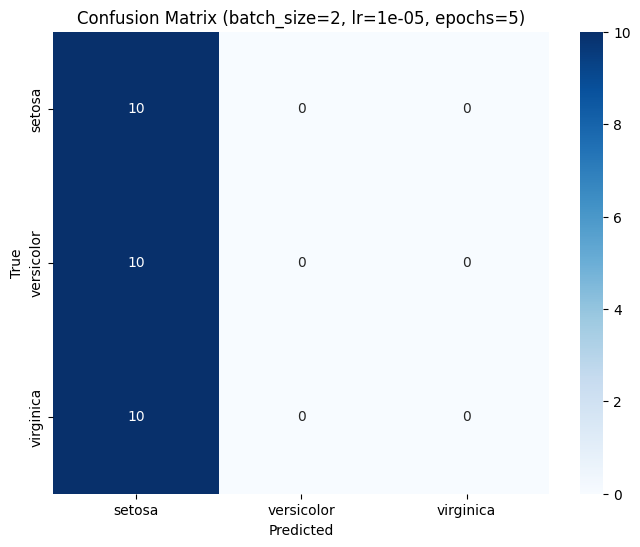

Testing complete.

Training with batch_size=4, lr=0.001, epochs=1

Manual Hyperparameters:
num_epochs: 1
learning_rate: 0.001
batch_size: 4
hidden_size: 16

Starting manual training...

Training complete.

Testing the trained model...
Accuracy: 0.3333333333333333
F1 Score: 0.16666666666666666


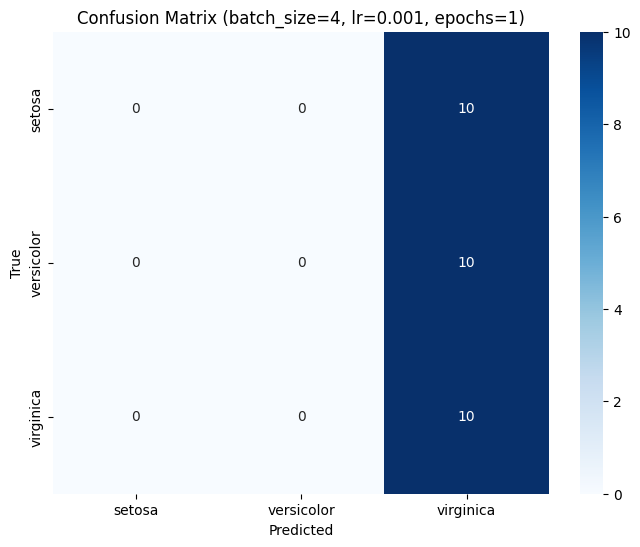

Testing complete.

Training with batch_size=4, lr=0.001, epochs=3

Manual Hyperparameters:
num_epochs: 3
learning_rate: 0.001
batch_size: 4
hidden_size: 16

Starting manual training...

Training complete.

Testing the trained model...
Accuracy: 0.7666666666666667
F1 Score: 0.7340930674264008


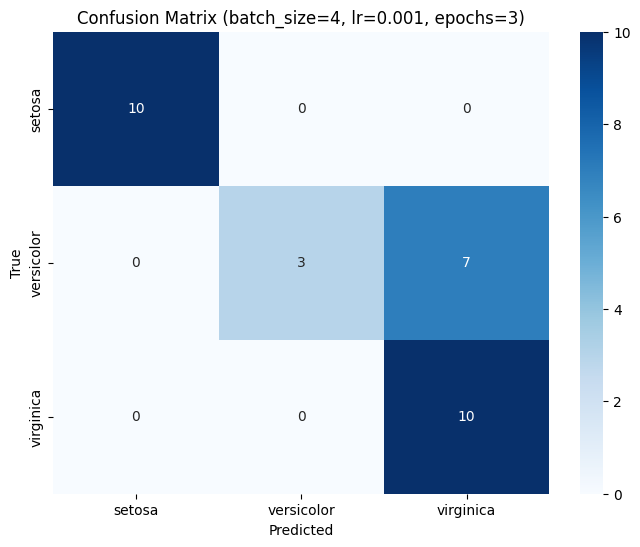

Testing complete.

Training with batch_size=4, lr=0.001, epochs=5

Manual Hyperparameters:
num_epochs: 5
learning_rate: 0.001
batch_size: 4
hidden_size: 16

Starting manual training...

Training complete.

Testing the trained model...
Accuracy: 0.8333333333333334
F1 Score: 0.8294970161977834


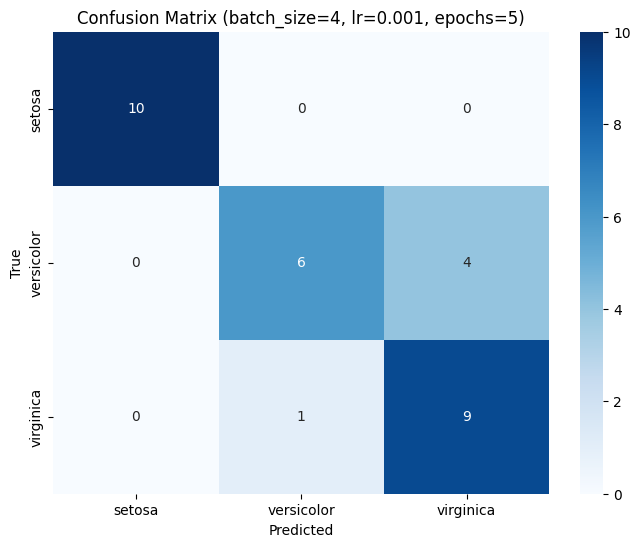

Testing complete.

Training with batch_size=4, lr=1e-05, epochs=1

Manual Hyperparameters:
num_epochs: 1
learning_rate: 1e-05
batch_size: 4
hidden_size: 16

Starting manual training...

Training complete.

Testing the trained model...
Accuracy: 0.3333333333333333
F1 Score: 0.16666666666666666


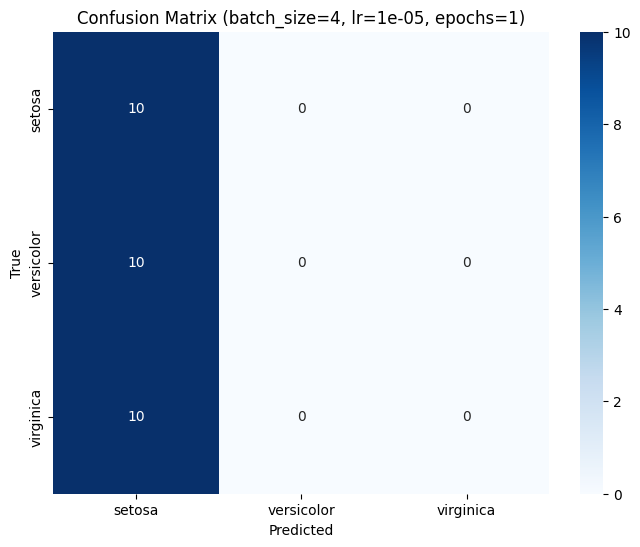

Testing complete.

Training with batch_size=4, lr=1e-05, epochs=3

Manual Hyperparameters:
num_epochs: 3
learning_rate: 1e-05
batch_size: 4
hidden_size: 16

Starting manual training...

Training complete.

Testing the trained model...
Accuracy: 0.3333333333333333
F1 Score: 0.16666666666666666


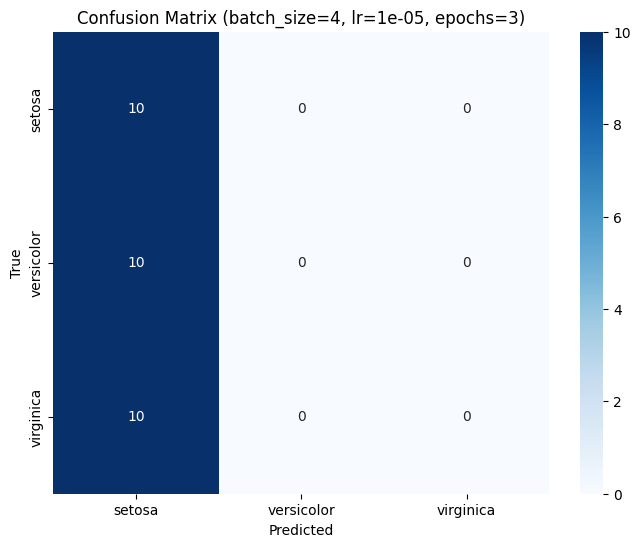

Testing complete.

Training with batch_size=4, lr=1e-05, epochs=5

Manual Hyperparameters:
num_epochs: 5
learning_rate: 1e-05
batch_size: 4
hidden_size: 16

Starting manual training...

Training complete.

Testing the trained model...
Accuracy: 0.3333333333333333
F1 Score: 0.16666666666666666


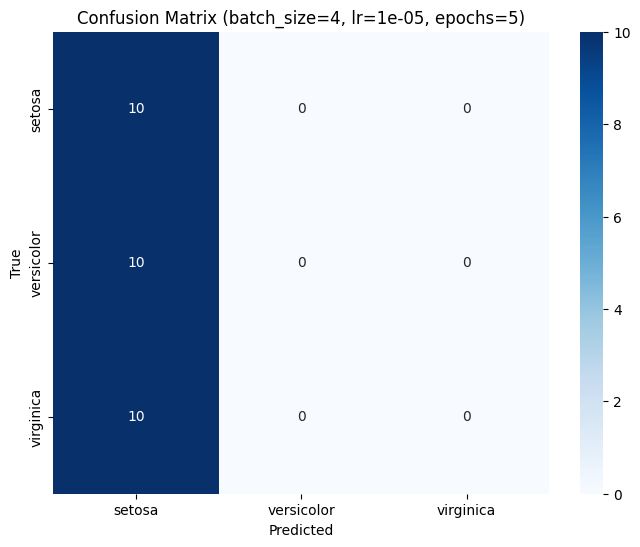

Testing complete.


In [ ]:
batch_sizes = [2, 4]
learning_rates = [1e-3, 1e-5]
epochs = [1, 3, 5]

acuracies = []
f1_scores = []
for batch_size in batch_sizes:
    for lr in learning_rates:
        for epoch in epochs:
            print(f"\nTraining with batch_size={batch_size}, lr={lr}, epochs={epoch}")
            predictor = train_manual_model(train_data, batch_size, lr, epoch)
            print("\nTraining complete.")

            # test the trained model by accruacy and f1 score using sklearn
            print("\nTesting the trained model...")
            y_pred = predictor.predict(test_data)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            print(f"Accuracy: {accuracy}")
            print(f"F1 Score: {f1}")
            acuracies.append(accuracy)
            f1_scores.append(f1)
            # plotting confusion matrix
            cm = confusion_matrix(y_test, y_pred)
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
            plt.xlabel('Predicted')
            plt.ylabel('True')
            plt.title(f'Confusion Matrix (batch_size={batch_size}, lr={lr}, epochs={epoch})')
            plt.show()
            print("Testing complete.")




### Task 2: Automated Hyperparameter Search (20%)


Use the Grid Search over the parameters defined above, Random Search, and Hyperband + Bayesian Optimization hyperparameter to search for the hyperparameters defined in Task 1.

In [ ]:
batch_sizes = [2, 4]
learning_rates = [1e-3, 1e-5]
epochs = [1, 3, 5]

In [ ]:
# datasets creation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/8, random_state=42, stratify=y_train)
print("Size of training set:", len(X_train))
print("Size of validation set:", len(X_val))
print("Size of testing set:", len(X_test))



# Creating DataFrames for train, validation, and test sets
train_df = pd.DataFrame(np.hstack((X_train, y_train.reshape(-1, 1))), 
                        columns=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])


test_df = pd.DataFrame(np.hstack((X_test, y_test.reshape(-1, 1))), 
                       columns=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])

val_df = pd.DataFrame(np.hstack((X_test, y_test)), columns=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])
val_data = TabularDataset(val_df)       # converting the validation data to TabularDataset

# Converting to TabularDataset
train_data = TabularDataset(train_df)
val_data = TabularDataset(val_df)
test_data = TabularDataset(test_df)



Size of training set: 105
Size of validation set: 15
Size of testing set: 30


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

def evaluate_model(predictor, test_data, y_test, data, accuracies, f1_scores):
    """
    Evaluates a trained model by computing accuracy and F1 score,
    and visualizing the confusion matrix.

    Parameters:
    predictor  : The trained model to be evaluated.
    test_data  : The test dataset (features).
    y_test     : The true labels for the test set.
    data       : Dataset object containing target names for labels.
    accuracies : List to store accuracy scores.
    f1_scores  : List to store F1 scores.
    """
    print("\nTesting the trained model...")

    # Make predictions
    y_pred = predictor.predict(test_data)

    # Compute accuracy and F1 score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print results
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")

    # Store results
    accuracies.append(accuracy)
    f1_scores.append(f1)

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm, annot=True, fmt='d', cmap='Blues',
        xticklabels=data.target_names, yticklabels=data.target_names
    )
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    print("Testing complete.")


In [53]:
import pandas as pd

def get_model_parameters(predictor, test_data):
    """
    Extracts model parameters, train accuracy, and validation accuracy from a predictor.

    Parameters:
        predictor: The trained predictor object.
        test_data: The test dataset used for evaluating model performance.

    Returns:
        pd.DataFrame: A DataFrame containing model parameters and performance metrics.
    """
    # Get leaderboard as a DataFrame
    leaderboard_df = predictor.leaderboard(test_data)

    # Initialize an empty list to store model parameters
    model_params_list = []

    # Iterate over all models in predictor
    for model_name in predictor.model_names():
        # Load the model
        model = predictor._trainer.load_model(model_name)
        
        # Extract train and validation accuracy from the leaderboard
        model_row = leaderboard_df.loc[leaderboard_df['model'] == model_name]
        train_accuracy = model_row['score_test'].values[0] if not model_row.empty else "N/A"
        val_accuracy = model_row['score_val'].values[0] if not model_row.empty else "N/A"

        # Extract relevant parameters
        params = {
            "Model Name": model_name,
            "Batch Size": model.params.get("batch_size", "N/A"),
            "Num Epochs": model.params.get("num_epochs", "N/A"),
            "Learning Rate": model.params.get("learning_rate", "N/A"),
            "Train Accuracy": train_accuracy,
            "Validation Accuracy": val_accuracy
        }
        
        # Append to the list
        model_params_list.append(params)

    # Convert the list into a pandas DataFrame
    df = pd.DataFrame(model_params_list)

    return df


In [ ]:
from autogluon.common import space as ag

def train_auto_model_grid(train_data, batch_sizes, learning_rates, epochs_list):
    """Train model with manual hyperparameters using updated space API"""
    # Define the search space, using categiorical discreet values for hyperparameters for grid search
    search_space = {
        'NN_TORCH': {
            'num_epochs': ag.Categorical(1,3,5),
            'learning_rate': ag.Categorical(1e-3, 1e-5),
            'batch_size': ag.Categorical(2, 4),
            'hidden_size': ag.Categorical(16),
        }
    }

    predictor = TabularPredictor(
        verbosity=2,
        label='target',
        problem_type='multiclass',
        eval_metric='accuracy',
        path='models/manual_mlp'
    )

    predictor.fit(
        train_data,
        
        tuning_data=val_data,
        use_bag_holdout=True,  # Use validation data for tuning 
        num_bag_folds=0,
        num_stack_levels=0,
        fit_weighted_ensemble =False,
        fit_full_last_level_weighted_ensemble= False,
        verbosity=2,
        # discussed with soham gaonkar (23110314) and he suggested to use the above args
        
        hyperparameter_tune_kwargs={
            'scheduler': 'local',
            'searcher': 'random',
            'num_trials': 12
        },
        hyperparameters=search_space,
        time_limit=600,
        presets='best_quality',
        ag_args_fit={'num_gpus': 1}
    )
    return predictor


In [36]:
predictor = train_auto_model_grid(train_data, batch_sizes, learning_rates, epochs)

2025-02-26 17:37:15,031	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/kaggle/working/models/manual_mlp/models/NeuralNetTorch' in 0.0085s.
2025-02-26 17:37:15,042	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 12 trial(s):
- 34c05_00000: FileNotFoundError('Could not fetch metrics for 34c05_00000: both result.json and progress.csv were not found at /kaggle/working/models/manual_mlp/models/NeuralNetTorch/34c05_00000')
- 34c05_00001: FileNotFoundError('Could not fetch metrics for 34c05_00001: both result.json and progress.csv were not found at /kaggle/working/models/manual_mlp/models/NeuralNetTorch/34c05_00001')
- 34c05_00002: FileNotFoundError('Could not fetch metrics for 34c05_00002: both result.json and progress.csv were not found at /kaggle/working/models/manual_mlp/models/NeuralNetTorch/34c05_00002')
- 34c05_00003: FileNotFoundError('Could not fetch metrics for 34c05_00003: both result.json and progress.csv were not foun

Create a table (Each row with a configuration and column with Accuracy and F1) for Grid, Random, Hyperband, and Bayesian search and compare their accuracy and F1. 

In [76]:
df1 = get_model_parameters(predictor, train_data)
df1

,Model Name,Batch Size,Num Epochs,Learning Rate,Train Accuracy,Validation Accuracy
0,NeuralNetTorch/34c05_00000,2,1,0.00100,0.761905,0.666667
1,NeuralNetTorch/34c05_00001,4,1,0.00001,0.342857,0.333333
2,NeuralNetTorch/34c05_00002,2,1,0.00001,0.533333,0.600000
3,NeuralNetTorch/34c05_00003,2,1,0.00100,0.752381,0.766667
4,NeuralNetTorch/34c05_00004,4,3,0.00001,0.390476,0.433333
5,NeuralNetTorch/34c05_00005,2,1,0.00100,0.333333,0.333333
6,NeuralNetTorch/34c05_00006,2,5,0.00100,0.666667,0.766667
7,NeuralNetTorch/34c05_00007,4,3,0.00001,0.523810,0.566667
8,NeuralNetTorch/34c05_00008,4,3,0.00001,0.552381,0.600000
9,NeuralNetTorch/34c05_00009,2,5,0.00001,0.333333,0.333333



Testing the trained model...
Accuracy: 0.7333333333333333
F1 Score: 0.6705516705516705


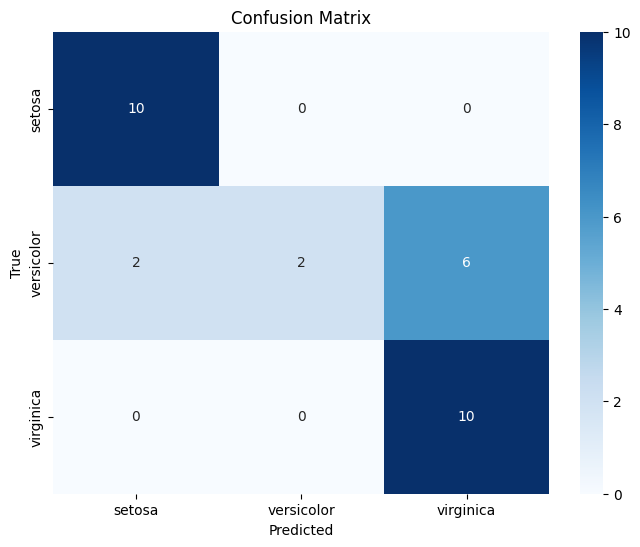

Testing complete.


In [14]:
accuracies = []
f1_scores = []

evaluate_model(predictor, test_data, y_test, data, accuracies, f1_scores)


In [ ]:
def train_auto_model_random(train_data):
    # Define the search space for neural network models (NN_TORCH)
    # Define the search space, using continuos values for hyperparameters for random search
    search_space = {
        'NN_TORCH': {
            'num_epochs': ag.Int(1, 10),            # Different epoch choices
            'learning_rate': ag.Real(1e-5, 1e-3),       # Different learning rates
            'batch_size': ag.Int(2, 4),                # Choices for batch size
            'hidden_size': ag.Categorical(16),                 # Fixed hidden layer size
        }
    }

    predictor = TabularPredictor(
        label='target',
        problem_type='multiclass',
        eval_metric='accuracy',
        path='models/manual_mlp_random',
        verbosity=1
    )

    # Use random search with a local scheduler and 12 trials
    predictor.fit(
        train_data=train_data,

        tuning_data=val_data,
        use_bag_holdout=True,  # Use validation data for tuning 
        num_bag_folds=0,
        num_stack_levels=0,
        fit_weighted_ensemble =False,
        fit_full_last_level_weighted_ensemble= False,
        verbosity=5,
        
        hyperparameters=search_space,
        hyperparameter_tune_kwargs={
            'scheduler': 'local',   # Local scheduler
            'searcher': 'random',     # Random search
            'num_trials': 5
        },
        time_limit=600,
        presets='best_quality',
        ag_args_fit={'num_gpus': 1}
    )
    return predictor


In [66]:
predictor2 = train_auto_model_random(train_data)

2025-02-26 18:06:12,266	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/kaggle/working/models/manual_mlp_random/models/NeuralNetTorch' in 0.0045s.
2025-02-26 18:06:12,274	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 5 trial(s):
- 4f3e5_00000: FileNotFoundError('Could not fetch metrics for 4f3e5_00000: both result.json and progress.csv were not found at /kaggle/working/models/manual_mlp_random/models/NeuralNetTorch/4f3e5_00000')
- 4f3e5_00001: FileNotFoundError('Could not fetch metrics for 4f3e5_00001: both result.json and progress.csv were not found at /kaggle/working/models/manual_mlp_random/models/NeuralNetTorch/4f3e5_00001')
- 4f3e5_00002: FileNotFoundError('Could not fetch metrics for 4f3e5_00002: both result.json and progress.csv were not found at /kaggle/working/models/manual_mlp_random/models/NeuralNetTorch/4f3e5_00002')
- 4f3e5_00003: FileNotFoundError('Could not fetch metrics for 4f3e5_00003: both result.json and

Loading: /kaggle/working/models/manual_mlp_random/models/NeuralNetTorch/4f3e5_00004/model.pkl



Testing the trained model...
Accuracy: 0.7333333333333333
F1 Score: 0.7069597069597069


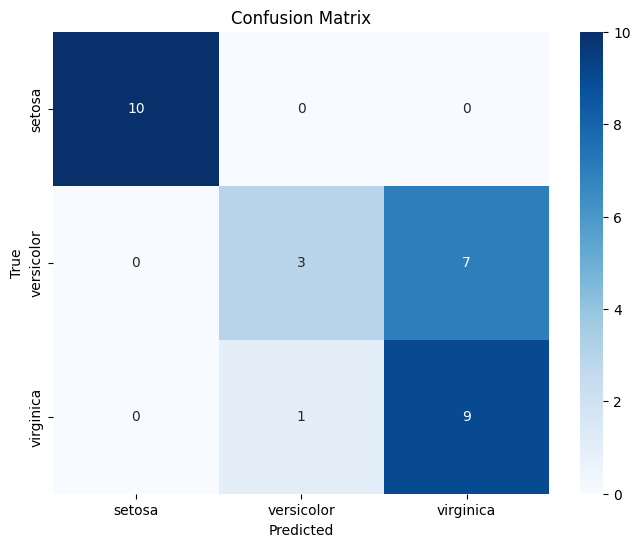

Testing complete.


In [67]:
evaluate_model(predictor2, test_data, y_test, data, accuracies, f1_scores)


In [77]:
df2 = get_model_parameters(predictor2, train_data)
df2

,Model Name,Batch Size,Num Epochs,Learning Rate,Train Accuracy,Validation Accuracy
0,NeuralNetTorch/4f3e5_00000,2,1,0.000010,0.390476,0.400000
1,NeuralNetTorch/4f3e5_00001,4,5,0.000268,0.704762,0.666667
2,NeuralNetTorch/4f3e5_00002,3,3,0.000888,0.809524,0.666667
3,NeuralNetTorch/4f3e5_00003,4,6,0.000722,0.828571,0.700000
4,NeuralNetTorch/4f3e5_00004,4,5,0.000546,0.800000,0.733333


In [ ]:
def train_auto_model_hyperband(train_data):
    # Define the search space for neural network models (NN_TORCH)
    # Define the search space, using continuos values for hyperparameters for hyperband search
    search_space = {
        'NN_TORCH': {
            'num_epochs': ag.Int(1, 10),            # Different epoch choices
            'learning_rate': ag.Real(1e-5, 1e-3),       # Different learning rates
            'batch_size': ag.Int(2, 4),                # Choices for batch size
            'hidden_size': ag.Categorical(16),                 # Fixed hidden layer size
        }
    }

    predictor = TabularPredictor(
        label='target',
        problem_type='multiclass',
        eval_metric='accuracy',
        path='models/manual_mlp_hyperband',
        verbosity=1
    )

    # Configure Hyperband-style tuning using the ASHA scheduler.
    # ASHA acts as a variant of Hyperband by early-stopping poor trials.
    predictor.fit(
        train_data=train_data,

        tuning_data=val_data,
        use_bag_holdout=True,  # Use validation data for tuning 
        num_bag_folds=0,
        num_stack_levels=0,
        fit_weighted_ensemble =False,
        fit_full_last_level_weighted_ensemble= False,
        verbosity=2,
        
        hyperparameters=search_space,
        hyperparameter_tune_kwargs={
            'scheduler': 'ASHA',    # ASHA scheduler for Hyperband-like behavior
            'searcher': 'random',    # Random search over the hyperparameter space
            'num_trials': 5,
            'grace_period': 1,       # Minimum resource allocation (e.g., minimum epochs)
            'reduction_factor': 3    # Factor to reduce trials at each rung
        },
        time_limit=600,
        presets='best_quality',
        ag_args_fit={'num_gpus': 1}
    )
    return predictor


2025-02-26 18:07:02,818	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/kaggle/working/models/manual_mlp_hyperband/models/NeuralNetTorch' in 0.0048s.
2025-02-26 18:07:02,824	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 5 trial(s):
- 6e128_00000: FileNotFoundError('Could not fetch metrics for 6e128_00000: both result.json and progress.csv were not found at /kaggle/working/models/manual_mlp_hyperband/models/NeuralNetTorch/6e128_00000')
- 6e128_00001: FileNotFoundError('Could not fetch metrics for 6e128_00001: both result.json and progress.csv were not found at /kaggle/working/models/manual_mlp_hyperband/models/NeuralNetTorch/6e128_00001')
- 6e128_00002: FileNotFoundError('Could not fetch metrics for 6e128_00002: both result.json and progress.csv were not found at /kaggle/working/models/manual_mlp_hyperband/models/NeuralNetTorch/6e128_00002')
- 6e128_00003: FileNotFoundError('Could not fetch metrics for 6e128_00003: both res


Testing the trained model...
Accuracy: 0.8333333333333334
F1 Score: 0.8294970161977834


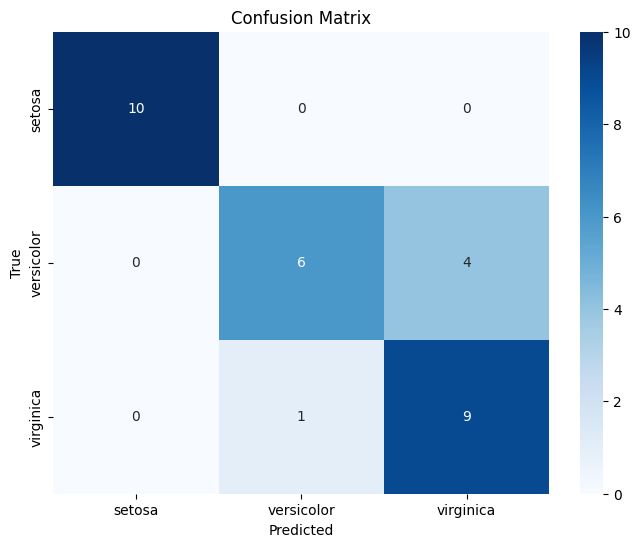

Testing complete.


In [71]:
predictor3 = train_auto_model_hyperband(train_data)

evaluate_model(predictor3, test_data, y_test, data, accuracies, f1_scores)

In [78]:
df3 = get_model_parameters(predictor3, train_data)
df3

,Model Name,Batch Size,Num Epochs,Learning Rate,Train Accuracy,Validation Accuracy
0,NeuralNetTorch/6e128_00000,2,1,0.000010,0.390476,0.400000
1,NeuralNetTorch/6e128_00001,2,7,0.000743,0.895238,0.833333
2,NeuralNetTorch/6e128_00002,3,9,0.000905,0.704762,0.766667
3,NeuralNetTorch/6e128_00003,4,7,0.000339,0.761905,0.700000
4,NeuralNetTorch/6e128_00004,2,1,0.000667,0.285714,0.333333


In [ ]:
def train_auto_model_bayes(train_data):
    # Define the search space for neural network models (NN_TORCH)
    # Define the search space, using continuos values for hyperparameters for bayesian optimisation
    search_space = {
        'NN_TORCH': {
            'num_epochs': ag.Int(1, 10),            # Different epoch choices
            'learning_rate': ag.Real(1e-5, 1e-3),       # Different learning rates
            'batch_size': ag.Int(2, 4),                # Choices for batch size
            'hidden_size': ag.Categorical(16),                 # Fixed hidden layer size
        }
    }

    predictor = TabularPredictor(
        label='target',
        problem_type='multiclass',
        eval_metric='accuracy',
        path='models/manual_mlp_bayes',
        verbosity=1
    )

    # Configure hyperparameter tuning to use Bayesian optimization.
    # Bayesian optimization uses a probabilistic surrogate model to guide the search.
    predictor.fit(
        train_data=train_data,

        tuning_data=val_data,
        use_bag_holdout=True,  # Use validation data for tuning 
        num_bag_folds=0,
        num_stack_levels=0,
        fit_weighted_ensemble =False,
        fit_full_last_level_weighted_ensemble= False,
        verbosity=2,
        
        hyperparameters=search_space,
        hyperparameter_tune_kwargs={
            'scheduler': 'ASHA',   # ASHA scheduler is typically used with bayesian search
            'searcher': 'bayes',     # Bayesian optimization searcher
            'num_trials': 12
        },
        time_limit=600,
        presets='best_quality',
        ag_args_fit={'num_gpus': 1}
    )
    return predictor


2025-02-26 18:08:29,452	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/kaggle/working/models/manual_mlp_bayes/models/NeuralNetTorch' in 0.0093s.
2025-02-26 18:08:29,463	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 12 trial(s):
- 8f5501b0: FileNotFoundError('Could not fetch metrics for 8f5501b0: both result.json and progress.csv were not found at /kaggle/working/models/manual_mlp_bayes/models/NeuralNetTorch/8f5501b0')
- 5f4d1eb5: FileNotFoundError('Could not fetch metrics for 5f4d1eb5: both result.json and progress.csv were not found at /kaggle/working/models/manual_mlp_bayes/models/NeuralNetTorch/5f4d1eb5')
- 875f4c18: FileNotFoundError('Could not fetch metrics for 875f4c18: both result.json and progress.csv were not found at /kaggle/working/models/manual_mlp_bayes/models/NeuralNetTorch/875f4c18')
- ad330e8b: FileNotFoundError('Could not fetch metrics for ad330e8b: both result.json and progress.csv were not found at /kag


Testing the trained model...
Accuracy: 0.9666666666666667
F1 Score: 0.9665831244778613


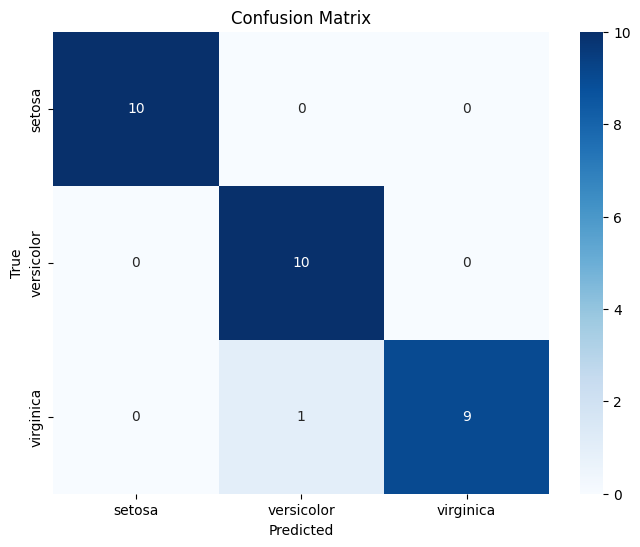

Testing complete.


In [74]:
predictor4 = train_auto_model_bayes(train_data)

evaluate_model(predictor4, test_data, y_test, data, accuracies, f1_scores)

In [79]:
df4 = get_model_parameters(predictor4, train_data)
df4

,Model Name,Batch Size,Num Epochs,Learning Rate,Train Accuracy,Validation Accuracy
0,NeuralNetTorch/8f5501b0,2,1,0.000010,0.390476,0.400000
1,NeuralNetTorch/5f4d1eb5,3,4,0.000049,0.400000,0.500000
2,NeuralNetTorch/875f4c18,3,7,0.000998,0.819048,0.833333
3,NeuralNetTorch/ad330e8b,2,4,0.000706,0.600000,0.533333
4,NeuralNetTorch/99c07629,4,4,0.000854,0.695238,0.766667
5,NeuralNetTorch/78b2ea69,2,8,0.000646,0.904762,0.966667
6,NeuralNetTorch/5dfac753,3,5,0.000331,0.666667,0.666667
7,NeuralNetTorch/a9d13025,3,6,0.000230,0.333333,0.333333
8,NeuralNetTorch/95db37e8,3,7,0.000340,0.685714,0.733333
9,NeuralNetTorch/01b2ef91,3,5,0.000496,0.742857,0.766667


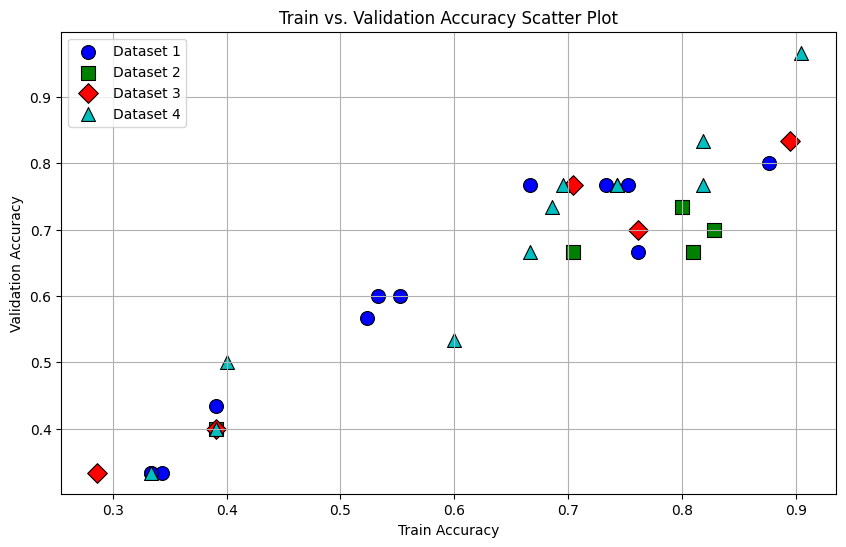

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_model_accuracies(*dfs, labels=None):
    """
    Plots scatter plots of Train Accuracy vs. Validation Accuracy for multiple DataFrames.

    Parameters:
        dfs: Tuple of pandas DataFrames (df1, df2, df3, df4, etc.).
        labels: Optional list of labels corresponding to each DataFrame.
    """
    plt.figure(figsize=(10, 6))
    
    colors = ['b', 'g', 'r', 'c', 'm', 'y']  # Define colors for different datasets
    markers = ['o', 's', 'D', '^', 'v', 'P']  # Different markers for datasets

    for i, df in enumerate(dfs):
        label = labels[i] if labels else f"Dataset {i+1}"
        color = colors[i % len(colors)]
        marker = markers[i % len(markers)]
        
        sns.scatterplot(
            x=df["Train Accuracy"],
            y=df["Validation Accuracy"],
            label=label,
            color=color,
            marker=marker,
            s=100,  # Size of points
            edgecolor="black"
        )

    plt.xlabel("Train Accuracy")
    plt.ylabel("Validation Accuracy")
    plt.title("Train vs. Validation Accuracy Scatter Plot")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_model_accuracies(df1, df2, df3, df4, labels=["Dataset 1", "Dataset 2", "Dataset 3", "Dataset 4"])


In [27]:
def print_results_table(accuracies, f1_scores):
    """
    Prints a table of accuracy and F1 scores for different search methods.

    Parameters:
    accuracies : List of accuracy scores.
    f1_scores  : List of F1 scores.
    """
    search_methods = ["Grid Search", "Random Search", "Hyperband Search", "Bayesian Search"]

    # Print table header
    print(f"{'Search Method':<20} {'Accuracy':<15} {'F1 Score':<15}")
    print("=" * 50)

    # Print each row
    for i in range(len(search_methods)):
        print(f"{search_methods[i]:<20} {accuracies[i]:<15.4f} {f1_scores[i]:<15.4f}")


print_results_table(accuracies, f1_scores)


Search Method        Accuracy        F1 Score       
Grid Search          0.7333          0.6755         
Random Search        0.7333          0.7070         
Hyperband Search     0.8333          0.8295         
Bayesian Search      0.9667          0.9666         
